<a href="https://www.kaggle.com/code/dingmama/10516?scriptVersionId=240656576" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 总览：常见机器学习全流程步骤

### **数据获取与理解** --> **数据预处理** --> **特征工程** --> **数据集构造** -->**模型选择与训练** --> **模型评估与调优**

- **数据获取与理解**
  
  *目标* : 明确业务场景，收集数据并初步探索数据分布和特征含义。
    
  *常见任务*
    - 数据来源 ：数据库、API、文件（CSV/Excel）、爬虫等。
    - 数据探索 ：使用 pandas 或 Dask 加载数据，检查缺失值、异常值、类别分布。
    - 统计描述 ：df.describe()、df.info()、df.isnull().sum()。
      
  *注意事项*
    - 数据质量 ：避免数据偏差（如样本不均衡）。
    - 业务理解 ：明确目标变量（如分类任务的标签）和特征含义。

  *python样例代码*
    - 数据读取
      ```python
        import pandas as pd
        # 加载数据
        train_df = pd.read_csv("train.csv")
        test_df = pd.read_csv("test.csv")
      ```
    - 探索性数据分析 (EDA)
      ```python
        # 查看数据分布
        print(train_df['Survived'].value_counts())  # 泰坦尼克号生存标签分布
        sns.countplot(x='Survived', data=train_df)  # 可视化类别平衡
      ```
      
  ---

     
- **数据预处理**

  *目标* : 将原始数据转换为模型可用的格式，减少噪声影响。

  *常见任务*
    - 缺失值处理 ：均值/中位数填充、插值、删除行；        工具函数：SimpleImputer、fillna
    - 特征缩放 ：标准化（Z-score）、归一化（Min-Max）；  工具函数：StandardScaler、MinMaxScaler
    - 类别编码 ： One-Hot编码、Label Encoding；        工具函数：OneHotEncoder、LabelEncoder
  
  *注意事项*
    - 训练集与测试集同步处理 ：避免数据泄露（如先划分数据集再标准化）。
    - 类别特征编码选择 ：
        - 有序特征（如 Pclass）：Label Encoding。
        - 无序特征（如 Embarked）：One-Hot Encoding。

  *分类特征编码python样例代码*
    ```python
        from sklearn.preprocessing import StandardScaler, OneHotEncoder
        from sklearn.compose import ColumnTransformer
        
        # 定义预处理管道
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', StandardScaler(), numerical_features),  # 数值特征标准化
                ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # 类别特征One-Hot
            ])
        
        # 应用预处理
        X_train_preprocessed = preprocessor.fit_transform(X_train)
    ```

  ---
  
- **特征工程**

  *目标* : 从原始特征中提取有用信息，提升模型性能。
    
  *常见任务*
    - 特征构造： 多项式特征、时间特征提取	      工具函数：PolynomialFeatures、pd.to_datetime
    - 特征选择： 方差选择、卡方检验、基于模型的特征选择	工具函数：SelectKBest、SelectFromModel
    - 降维： PCA、t-SNE	                     工具函数: PCA
      
  *注意事项*
    - 避免过拟合 ：不要构造过多冗余特征（如高阶多项式）。
    - 领域知识结合 ：如泰坦尼克号中提取头衔（Title）、家庭规模（FamilySize）。

  *python样例代码*
    - 时间特征提取
  
      ```python
      # 提取时间特征（假设数据中包含日期字段）
      df['datetime'] = pd.to_datetime(df['datetime'])
      df['hour'] = df['datetime'].dt.hour
      df['day_of_week'] = df['datetime'].dt.dayofweek
      ```
    - 多项式特征构造
      
      ```python
      # 构造多项式特征
      from sklearn.preprocessing import PolynomialFeatures
      poly = PolynomialFeatures(degree=2, include_bias=False)
      X_poly = poly.fit_transform(X)
      ```

---

- **数据集构造**

*目标* : 构建待输入模型的数据集，包含特征与标签；在这个过程中需 **确保数据质量与分布合理性**，并通过划分训练/验证/测试集评估模型泛化能力。

#### *常见任务的数据集构造*

*分类任务*  
   - **定义**：预测离散类别标签（如垃圾邮件检测）。  
   - **数据构造要点**：  
     - 类别平衡：对不平衡数据采用过采样（SMOTE）或欠采样。  
     - 正负样本比例调整（如二分类中 1:1 平衡）。  
   - **案例**：泰坦尼克号生存预测（性别、舱位等特征预测生存与否）。

*回归任务* 
   - **定义**：预测连续数值（如房价、温度）。  
   - **数据构造要点**：  
     - 异常值处理：剔除或截尾（Winsorization）。  
     - 特征工程：构造新特征、多项式特征或交互项（如面积×房龄）。  
   - **案例**：波士顿房价预测（房间数、犯罪率等预测房价）。

*时序预测任务* 
   - **定义**：基于时间序列预测未来值（如股票价格、电力负荷）。  
   - **数据构造要点**：  
     - 滑动窗口：将时间序列转换为监督学习格式（如用 $ t-3, t-2, t-1 $ 预测 $ t $）。  
     - 时间划分：按时间顺序划分数据集，避免未来信息泄露。  
     - 季节性/趋势处理：差分（Differencing）或分解（STL 分解）。  
   - **案例**：电力日负荷预测（历史负荷、天气数据预测未来用电量）。

#### *训练/验证/测试集划分*

1. **常规划分方法**  
   - **留出法**：按比例划分（如 70% 训练、15% 验证、15% 测试）。  
   - **交叉验证**：小数据集推荐 K 折交叉验证（如 K=5）。  
   - **分层抽样**：分类任务中保持类别分布一致性（如 `StratifiedKFold`）。

2. **时序数据划分**  
   - **时间序列专用方法**：  
     ```python
     # 按时间排序后滚动划分
     train_size = int(len(data) * 0.8)
     train, test = data[:train_size], data[train_size:]

#### *注意事项*  
- **数据分布一致性**：训练集与测试集需来自同一分布（如避免训练集包含特殊节假日数据而测试集无此类样本）。  
- **防止信息泄露**：  
  - 验证/测试集不参与特征工程（如标准化需用训练集参数）。  
  - 时序数据禁止随机打乱（Shuffle）。  
- **类别特征处理**：高基数类别建议使用目标编码（Target Encoding）。  
- **时间戳处理**：提取时间特征（如小时、星期几）并保留原始时间索引。

#### *Python 样例代码*
   ```python
   from sklearn.model_selection import train_test_split
   from sklearn.preprocessing import StandardScaler, OneHotEncoder

   # 分类任务：类别编码 + 划分
   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

   # 回归任务：标准化 + 异常值处理
   X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

   # 时序滑动窗口构造
   def create_window(data, window_size):
       X, y = [], []
       for i in range(len(data) - window_size):
           X.append(data[i:i+window_size])
           y.append(data[i+window_size])
       return np.array(X), np.array(y)
   ```
---

- **模型选择与训练**

  *目标* : 选择合适的模型并训练，使其从数据中学习规律，用于在测试数据中使用学习到的规律进行预测。
    
  *常见任务*
    - 分类： 预测值类型为分类参数。  常用算法：逻辑回归、决策树、随机森林、GBDT、SVM。 案例：泰坦尼克号生存预测
    - 回归： 预测值类型为连续参数。  线性回归、决策树回归、随机森林回归、GBDT回归。 案例：房价预测
    - 聚类： K-Means、DBSCAN	客户分群
    - 降维： PCA、t-SNE	数据可视化
       
  *注意事项*
    - 模型复杂度与过拟合 ：
        - 小数据集：简单模型（如逻辑回归）。
        - 大数据集：复杂模型（如 LightGBM、XGBoost）。
    - 早停法（Early Stopping） ：防止过拟合（如 GBDT 的 early_stopping_rounds）。

  *python样例代码*
    - 模型训练
  
      ```python
        from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
        from xgboost import XGBClassifier
        
        # 初始化模型
        rf = RandomForestClassifier(n_estimators=100, random_state=42)
        gbdt = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
        xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
        
        # 训练模型
        rf.fit(X_train, y_train)
        gbdt.fit(X_train, y_train)
        xgb.fit(X_train, y_train)
      ```

  ---

  - **模型评估与调优**

  *目标* : 评估模型性能，调整参数以提升效果。
    
  *常见任务*
    - 评估指标： 准确率、精确率、召回率、F1、AUC-ROC	；    工具函数： classification_report、roc_auc_score
    - 交叉验证： K折交叉验证、分层交叉验证	    ；       工具函数： cross_val_score
    - 参数调优： 网格搜索、随机搜索	            ；      工具函数： GridSearchCV、RandomizedSearchCV

  *注意事项*
    - 评估指标选择 ：
        - 类别不平衡：优先使用 F1 或 AUC-ROC。
        - 多分类任务：使用宏平均（Macro）或加权平均（Weighted）。

  *python样例代码*
    - 通过网格搜索寻找最优超参数
  
      ```python
        from sklearn.model_selection import GridSearchCV

        # 定义参数网格
        param_grid = {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 5]
        }
        
        # 网格搜索
        grid = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, scoring='accuracy')
        grid.fit(X_train, y_train)
        
        # 输出最佳参数
        print("最佳参数：", grid.best_params_)
        print("最佳验证准确率：", grid.best_score_)
      ```

  ---

# 泰坦尼克号---来自灾难的机器学习

## 机器学习任务概述

泰坦尼克号的沉没是历史上家喻户晓的沉船事件之一。1912年4月15日，在她的首次航行中，被广泛认为“永不沉没”的泰坦尼克号在与冰山相撞后沉没。不幸的是，没有足够的救生艇供船上每个人使用，导致2224名乘客和1502名船员死亡。

虽然幸存下来可能涉及到一些运气成分，但是似乎有些人比其他人更有可能幸存。

在这个机器学习任务中，要求使用乘客数据（即姓名、年龄、性别、社会经济阶层等数据），建立一个分类预测模型来回答以下问题：“什么样的人更有可能幸存？”

# 一、环境准备与数据加载

## **泰坦尼克号生存预测数据集概述**

数据被分为两组：
- 训练集（train.csv）
- 测试集（test.csv）
训练集应用于构建您的机器学习模型。

对于训练集，我们为每个乘客提供结果（也称为“真实情况”）。您的模型将基于乘客的性别和等级等“特征”。您还可以使用特征工程来创建新特征。

测试集应用于查看您的模型在未见数据上的表现。对于测试集，我们不提供每个乘客的真实情况。预测这些结果是您的工作。

使用你在train.csv数据中识别出的模式，预测穿上的其他418名乘客(test.csv)是否幸存。

In [1]:
# 安装依赖包
!pip install pandas numpy matplotlib seaborn scikit-learn tensorflow --quiet

In [2]:
# 导入必要库
import copy          # 复制变量库
import pandas as pd  # 数据处理核心库
import numpy as np   # 数值计算库
import seaborn as sns  # 高级可视化库
import warnings      # 取消报警信息打印
warnings.filterwarnings("ignore")

In [3]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
# 设置全局样式
plt.style.use('seaborn-notebook')

# 1. 安装字体（如果未安装）
!apt-get update
!apt-get install -y fonts-noto-cjk
 
# 2. 查找并加载 Noto Sans CJK 字体
font_path = "/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc"  # 可能路径
my_font = fm.FontProperties(fname=font_path)
 
# 3. 设置 Matplotlib 字体
plt.rcParams["font.family"] = my_font.get_name()  # 让 Matplotlib 识别中文
plt.rcParams["axes.unicode_minus"] = False  # 解决负号问题

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]                             
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]                
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]                           
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]                           
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]                                
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease                        
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,683 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updat

In [38]:
# 加载数据集（假设数据文件与Notebook在同一目录）
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")  # 训练集
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")    # 测试集（无Survived标签）
test_passenger_id = test_df["PassengerId"]
print("原始数据维度：", train_df.shape)

原始数据维度： (891, 12)


In [39]:
train_df.info()    # 获取dataframe列名及列类型信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 数据列名、中文含义及数据特征：

| 列名         | 中文含义     | 数据类型                 |
|--------------|--------------|--------------------------|
| PassengerId  | 乘客ID       | 整数                     |
| Survived     | 生存状态     | 0/1（0=死亡，1=存活）    |
| Pclass       | 舱位等级     | 1/2/3 分别代表一等座、二等座、三等座                |
| Name         | 姓名         | 字符串                   |
| Sex          | 性别         | male/female              |
| Age          | 年龄         | 浮点数（含缺失值）       |
| SibSp        | 兄弟姐妹数   | 整数                     |
| Parch        | 父母子女数   | 整数                     |
| Ticket       | 船票编号     | 字符串                   |
| Fare         | 票价         | 浮点数                   |
| Cabin        | 客舱号       | 字符串（含缺失值）       |
| Embarked     | 登船港口     | C/Q/S（含缺失值）        |

# 二、数据探索性分析（EDA）

*了解数据、分析问题、制定策略*

In [40]:
# 查看数据前5行（观察特征类型）
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**了解样本中数值特征的分布情况**

- 样本总数为891人，约占泰坦尼克号上实际乘客人数（2224人）的40%；
- Survived是具有0或1的二分变量，均值为0.38，代表实际存活率32%；
- 大多数乘客(>50%)的舱位等级为三；
- 年龄在65-80岁之间的老年乘客很少(<1%)；
- 近30%的乘客有兄弟姐妹或配偶一同旅行；
- 大多数乘客(>75%)没有与父母或孩子一起旅行；
- 票价差异很大，少数乘客(<1%)支付金额高达512美元。

In [41]:
# 快速数值特征统计信息概览
train_df.describe(percentiles=[.5, .6, .7, .8, .9, .99])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
60%,535.000000,0.000000,3.000000,31.800000,0.000000,0.000000,21.679200
70%,624.000000,1.000000,3.000000,36.000000,1.000000,0.000000,27.000000
80%,713.000000,1.000000,3.000000,41.000000,1.000000,1.000000,39.687500
90%,802.000000,1.000000,3.000000,50.000000,1.000000,2.000000,77.958300
99%,882.100000,1.000000,3.000000,65.870000,5.000000,4.000000,249.006220


**了解样本中分类特征的分布情况**

- 名称在数据集中是唯一的 (count=unique=891)；
- 性别变量有两个可选值，男性占数据的65%；
- 船舱号也有较多重复，说明存在几名乘客共用一个小舱的现象；
- 总共有3个登船口，大多数乘客是S口。

In [42]:
# 快速分类特征统计信息概览"
train_df.describe(include=[object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## 通过图表探索各个特征下数据分布特征

## 年龄 Age

首先了解数值特征Age与我们解决方案目标（Survived）之间的相关性。

- 婴儿（年龄<=5)的存活率很高；
- 大部分幸存乘客的年龄在15-35随之间

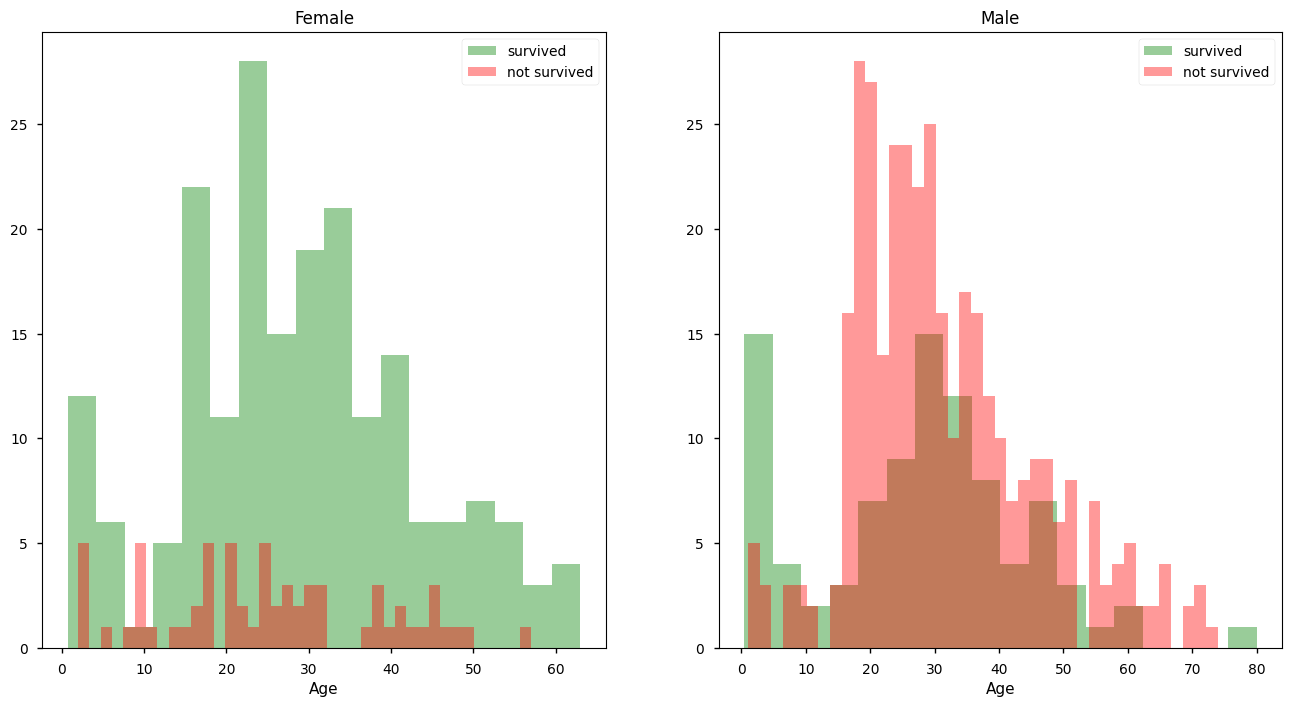

In [43]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 8))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False, color="green")
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False, color="red")
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False, color="green")
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False, color="red")
ax.legend()
_ = ax.set_title('Male');

## 舱位等级

通过对不同舱位等级生还率的统计，我们可以发现： 舱位等级越高，生存概率越高，因此 Pclass 应纳入模型训练之中。

Text(0.5, 1.0, '舱位等级生存率')

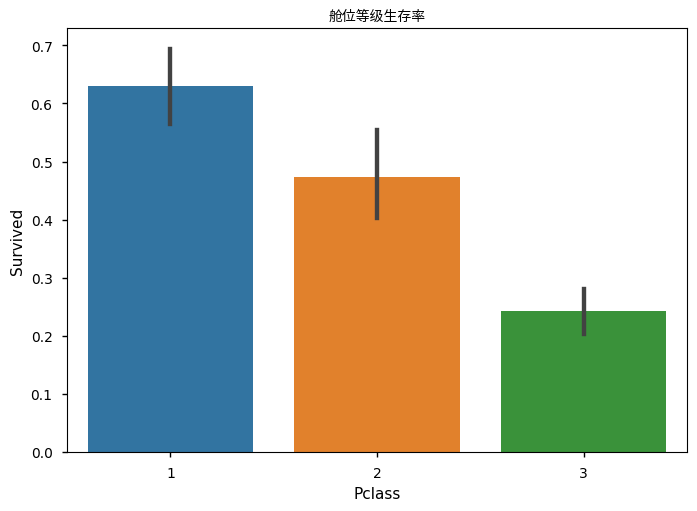

In [44]:
sns.barplot(x='Pclass', y='Survived', data=train_df);
plt.title("舱位等级生存率", fontproperties=my_font)

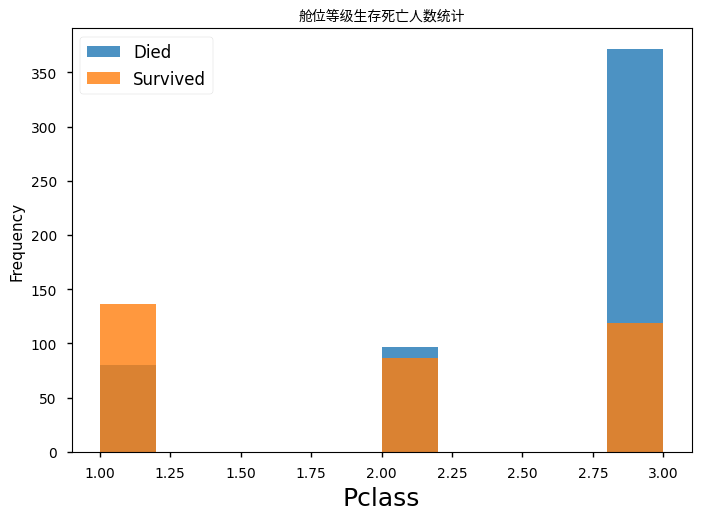

In [45]:
plt.figure()
fig = train_df.groupby('Survived')['Pclass'].plot.hist(histtype= 'bar', alpha = 0.8)
plt.legend(('Died','Survived'), fontsize = 12)
plt.xlabel('Pclass', fontsize = 18)
plt.title("舱位等级生存死亡人数统计", fontproperties=my_font)
plt.show()

## 家属数量

如果你和1到3个人一起旅行，你更有可能生存下来，如果你有0个或3个以上的人，你的生存机会就会减少。


Text(0.5, 1.0, '家属数量对生存率的影响')

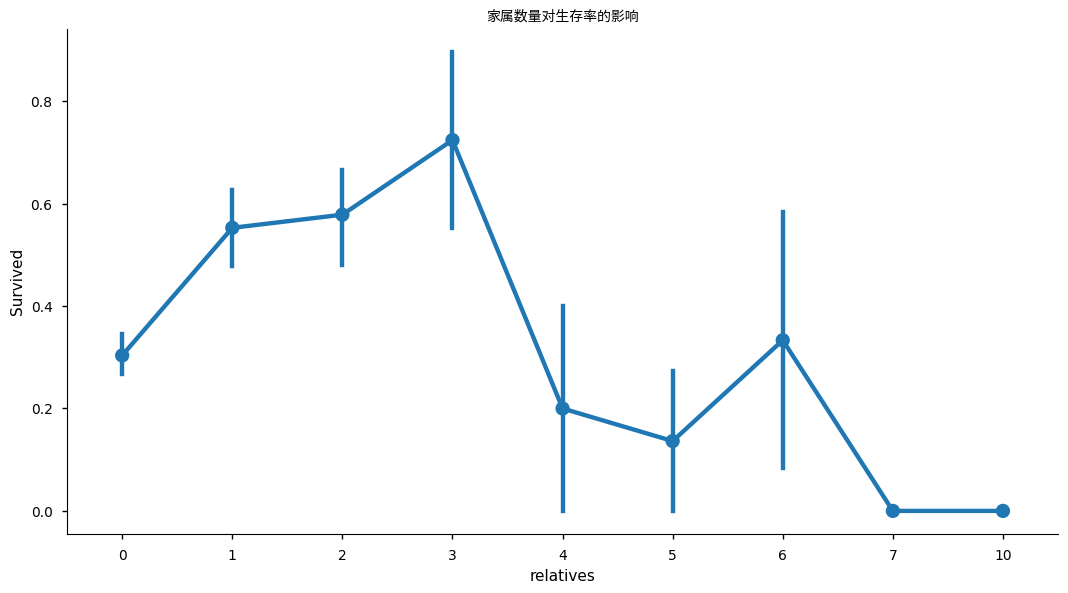

In [46]:
data = copy.deepcopy(train_df)
data['relatives'] = data['SibSp'] + data['Parch']
# catplot专门用来绘制分类变量的图标，支持点图、箱型图、小提琴型图等
ax = sns.catplot(x='relatives',y='Survived', data=data, kind="point");
ax.figure.set_size_inches(12,6)
plt.title("家属数量对生存率的影响", fontproperties=my_font)

## 出发港口 Embarked

- Embarked= S 和 Q 中，女性乘客存活率远高于男性；Embarked=C中，男性存活率较高。这可能时Embarked与Sex相关，而Sex和Survived相关，进而造成Embarked与Survived间接相关；
- 对于同一票价等级和同一性别，不同登船舱口的存活率不同。

综上分析，在模型训练中应添加Sex和Embarked特征。

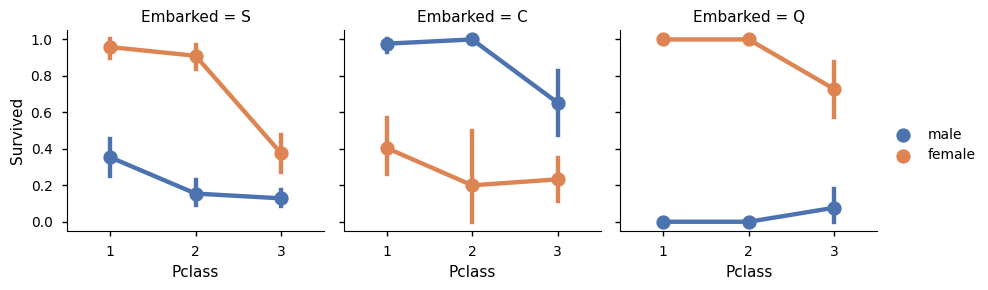

In [47]:
# FacetGrid是Seaborn中用于创建分面图的函数，可以指定分类变量，针对分类变量的每一个取值分别画图
grid = sns.FacetGrid(train_df, col="Embarked")
# 使用map函数将画图函数映射到上面创建的所有分面图中
# 函数后分别有三个字段，分别代表了横轴变量(x)、纵轴变量(y)、分组变量(hue)
grid.map(sns.pointplot, "Pclass", "Survived", "Sex", palette="deep")
grid.add_legend()

## **基于数据分析的假设**

**根据探索性数据分析，我们可以知道每个特征与幸存Survived的相关性如何，以便后续建模**
- Age年龄特征肯定与幸存相关；
- Embarked 登录港口可能与幸存或其他重要特征相关；
- Ticket 票号包含较高重复率，并且与幸存之间可能没有相关性，因此可以从分析中剔除；
- Cabin 客舱号可以被丢弃，因为在训练和测试集中均有较高确实率；
- PassengerID 乘客编号可以从训练数据中删除，因为与幸存无关；
- Name 名字虽与幸存无关，但是名称中带有的英文称谓可能有助于判断是否幸存。

# 三、数据清洗与特征工程

## 1. 剔除无用特征 Ticket PassengerID Cabin

In [48]:
train_df = train_df.drop(["PassengerId", "Ticket", "Cabin"], axis=1)
test_df = test_df.drop(["PassengerId", "Ticket", "Cabin"], axis=1)

## 2. 处理缺失值


首先 查看dataframe每一列的数值缺失情况

In [49]:
print(train_df.isnull().sum())
print("-" * 20)
print(test_df.isnull().sum())

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64
--------------------
Pclass       0
Name         0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64


### 填补缺失值的方法

- 方法一：对于缺失值少的特征，可以使用全部数据来填补缺失值，常见填补缺失值的方法：对于分类变量常使用全量数据的众数填补，对于连续变量使用全量数据的均值、中位数填补。

数据中 Fare 和 Embarked 缺失值较少，可以使用该方法填补，Fare为连续变量，使用中位数填补，Embarked为分类变量，使用众数填补。

In [50]:
# 合并训练集和测试集以便统一处理（便于后续特征工程）
full_data = [train_df, test_df]

# 1.3 填补票价缺失（使用中位数填补）
for dataset in full_data:
    dataset['Fare'] = dataset['Fare'].fillna(dataset['Fare'].median())

# 1.2 填补登船港口（用出众数填补）
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna(dataset['Embarked'].mode()[0])

- 方法二：对于缺失值较多的特征，可以使用其他相关特征来辅助填补该特征

注意到Age、Sex和Pclass之间的相关性，使用相同的Pclass和Sex特征组合下未缺失的Age数据来填补有缺失的Age数据，比如当Pclass和Sex相同时，有100组未缺失Age数据，10组缺失Age数据，可以使用未缺失的该分组下Age的均值、中位数来填充Age缺失值；

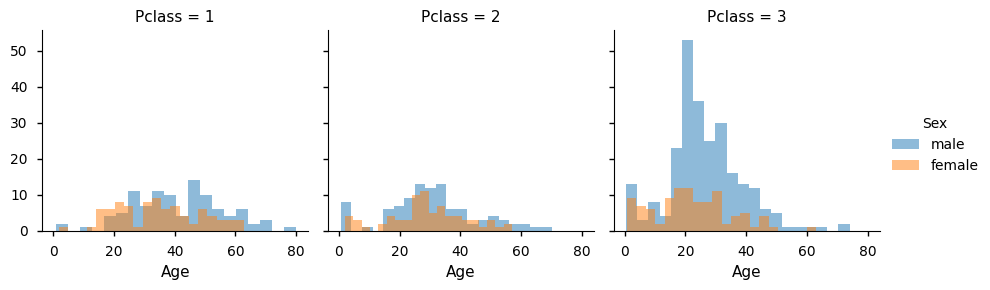

In [51]:
# 绘制Age、Pclass、Sex的复合直方图
grid = sns.FacetGrid(train_df, col="Pclass", hue="Sex")
grid.map(plt.hist, "Age", alpha=0.5, bins=20)
grid.add_legend()

In [52]:
# Pclass 是3分类变量， Sex为2分类变量，我们可以轻易统计出每种分组下的年龄数据分布情况
guess_ages = np.zeros((2, 3))
Sex_class = ["male", "female"]
for dataset in full_data:
    # 第一个双层嵌套for循环计算每一个分组的Age的预测值
    for i in range(2):
        for j in range(3):
            guess_df = dataset[(dataset.Sex == Sex_class[i]) & (dataset.Pclass == int(j+1))]["Age"].dropna()
            guess_ages[i, j] = guess_df.median()

    # 第二个for循环对原数据中的空值进行填补
    for i in range(2):
        for j in range(3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == Sex_class[i]) & (dataset.Pclass == j+1), "Age"] = guess_ages[i, j]
    dataset["Age"] = dataset["Age"].astype(int)

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(3)
memory usage: 62.8+ KB


- 方法三：作为方法二的进阶版，可以在使用其他完整的特征以及未缺失的数据来训练预测模型，用来预测特征的缺失值。对于需要扣准确率的比赛可以尝试，在此不做详述。

## 3. 构造新特征

### 3.1 家庭规模特征

In [53]:
for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1  # +1包含自己
dataset.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,3,"Kelly, Mr. James",male,34,0,0,7.8292,Q,1
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,7.0000,S,2
2,2,"Myles, Mr. Thomas Francis",male,62,0,0,9.6875,Q,1
3,3,"Wirz, Mr. Albert",male,27,0,0,8.6625,S,1
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,12.2875,S,3


### 3.2 姓名中提取头衔

使用正则表达式提取名称中的称谓Title, 正则表达式 ([A-Za-z]+)\. 可以匹配Name特征中以点字符结尾的第一个单词， expand=False 返回一个DataFrame。


In [54]:
for dataset in full_data:
    # 从姓名中提取头衔（如"Mr", "Mrs", "Master"）
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

# 统一罕见头衔
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', 
        'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    dataset.drop("Name", axis=1, inplace=True)
dataset.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,3,male,34,0,0,7.8292,Q,1,Mr
1,3,female,47,1,0,7.0000,S,2,Mrs
2,2,male,62,0,0,9.6875,Q,1,Mr
3,3,male,27,0,0,8.6625,S,1,Mr
4,3,female,22,1,1,12.2875,S,3,Mrs


可视化分析不同头衔的人的生存率，不同title下幸存率差异巨大，因此，决定保留新的Title特征用于模型训练。

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Mr'),
  Text(1, 0, 'Mrs'),
  Text(2, 0, 'Miss'),
  Text(3, 0, 'Master'),
  Text(4, 0, 'Rare')])

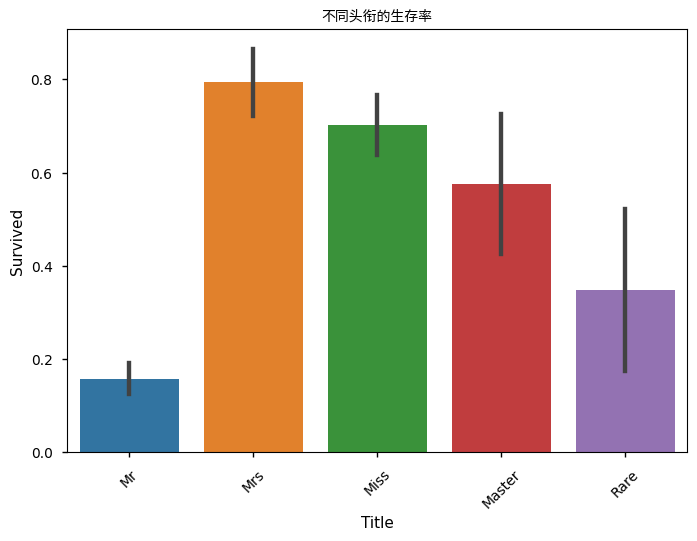

In [55]:
# 分析不同头衔的生存率
sns.barplot(x="Title", y="Survived", data=train_df)
plt.title('不同头衔的生存率', fontproperties=my_font)
plt.xticks(rotation=45)  # 旋转标签避免重叠

## 3. 分类特征(离散特征)编码

In [56]:
dataset.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,3,male,34,0,0,7.8292,Q,1,Mr
1,3,female,47,1,0,7.0000,S,2,Mrs
2,2,male,62,0,0,9.6875,Q,1,Mr
3,3,male,27,0,0,8.6625,S,1,Mr
4,3,female,22,1,1,12.2875,S,3,Mrs


### (1). 编码类型

特征类型编码分为：
- 独热编码（One-Hot Encoding）
  
    定义 ：将分类变量转换为二进制向量（0/1），每个类别对应一个新特征（列）。
  
    示例 ：
  
    原始数据：["red", "blue", "green"]
  
    独热编码后：
  
        red | blue | green
        ----|------|------
        1   | 0    | 0
        0   | 1    | 0
        0   | 0    | 1
  
- 整数编码（Label Encoding）

    定义 ：将分类变量映射为整数（0到n_classes-1），每个类别对应一个整数值。

  
    示例 ：

    原始数据：["red", "blue", "green"]

    整数编码后：

        red → 0
        blue → 1
        green → 2
### (2). 特征类型与模型适应性

性别（Sex） 是二元特征（male/female），直接映射为 0/1 等价于 One-Hot 编码（只是省去了生成冗余列的步骤）。

头衔（Title） 虽然是多分类（如 Mr, Miss, Mrs 等），但树模型（如随机森林）对整数标签编码敏感，不需要 One-Hot 编码即可有效分割节点。

### (2). 树模型 vs 线性模型
#### 1) 树模型（如随机森林） ：

直接接受整数标签编码（Label Encoding），因为它们通过分裂阈值 （如 Title ≤ 2.5）来处理特征。
One-Hot 编码反而会增加维度，导致计算量上升且无实质收益。

#### 2) 线性模型（如逻辑回归） ：
必须使用 One-Hot 编码，因为模型假设特征是连续值或二值特征。
如果用 Label Encoding 会错误地引入顺序性 （如 Title=1（Mr） < Title=2（Miss）会被线性模型理解为数值关系）。

### 整数编码

方法一：字典映射

In [57]:
cleaned_data = copy.deepcopy(full_data)
# 性别映射（male=0, female=1）
for dataset in cleaned_data:
    dataset['Sex'] = dataset['Sex'].map({'male':0, 'female':1}).astype(int)

# 头衔转为数值类别（One-Hot编码前奏）
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in cleaned_data:
    dataset['Title'] = dataset['Title'].map(title_mapping).fillna(0).astype(int)

# Embarked 映射
embarked_mapping = {"Q": 1, "S": 2, "C": 3}
for dataset in cleaned_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping).fillna(0).astype(int)

dataset.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,3,0,34,0,0,7.8292,1,1,1
1,3,1,47,1,0,7.0000,2,2,3
2,2,0,62,0,0,9.6875,1,1,1
3,3,0,27,0,0,8.6625,2,1,1
4,3,1,22,1,1,12.2875,2,3,3


方法二：LabelEncoder

In [58]:
from sklearn.preprocessing import LabelEncoder
cleaned_data = copy.deepcopy(full_data)

encoder = LabelEncoder()
processed_columns = ["Sex", "Title", "Embarked"]
for column in processed_columns:
    # 训练集使用fit_transform先训练encoder再为训练数据进行编码
    cleaned_data[0][column] = encoder.fit_transform(cleaned_data[0][column])
    # 测试集使用transform不进行训练直接为测试数据进行编码
    cleaned_data[1][column] = encoder.transform(cleaned_data[1][column])
    
cleaned_data[0].head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,0,3,1,22,1,0,7.2500,2,2,2
1,1,1,0,38,1,0,71.2833,0,2,3
2,1,3,0,26,0,0,7.9250,2,1,1
3,1,1,0,35,1,0,53.1000,2,2,3
4,0,3,1,35,0,0,8.0500,2,1,2


### 独热编码 (one-hot encoding)

方法一：pandas工具包中的get_dummies

**优势**：编码后的列名清晰直观，为原列名+类别名，如：Title_Miss，Title_Mr，Title_Mrs，Title_Rare	

**缺点**：不能训练数据和测试数据单独使用get_dummies，因为可能某一个分类变量训练集出现了5种，而测试集因为数据有限只出现了3种，导致转化后的训练集测试集维度不一致 需要将训练数据和测试数据拼接在一起使用

In [59]:
cleaned_data = copy.deepcopy(full_data)

full_cleaned_data = pd.concat([cleaned_data[0], cleaned_data[1]])
full_cleaned_data = pd.get_dummies(full_cleaned_data, columns=processed_columns, dtype=int, drop_first=True)
cleaned_data[0] = full_cleaned_data.iloc[:len(cleaned_data[0]), :]
cleaned_data[1] = full_cleaned_data.iloc[len(cleaned_data[0]):, :]
cleaned_data[0].head()

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Embarked_Q,Embarked_S
0,0.0,3,22,1,0,7.2500,2,1,0,1,0,0,0,1
1,1.0,1,38,1,0,71.2833,2,0,0,0,1,0,0,0
2,1.0,3,26,0,0,7.9250,1,0,1,0,0,0,0,1
3,1.0,1,35,1,0,53.1000,2,0,0,0,1,0,0,1
4,0.0,3,35,0,0,8.0500,1,1,0,1,0,0,0,1


方法二：OneHotEncoder

**优势**：不需要把待预测数据与原训练数据拼接，使用原数据训练完以后即可对任意数据进行推理。

**缺点**：生成结果是np.ndarray格式，不是dataframe格式，没有明显的类别标签。

In [60]:
cleaned_data = copy.deepcopy(full_data)

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# 定义需要 One-Hot 编码的列
categorical_features = ["Sex", "Embarked", "Title"]
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_features)])

cleaned_data[0] = preprocessor.fit_transform(cleaned_data[0])
cleaned_data[1] = preprocessor.transform(cleaned_data[1])
cleaned_data[0]

array([[0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.]])

# 四、模型训练与评估

我们的问题时想确定输出（幸存与否）与其他变量或特征（年龄、性别、舱位等级...）之间的关系，这属于典型的分类问题。

当使用给定的特征和标签数据集训练我们的模型时，我们称为有监督式的学习。这种类型的模型主要有：

- 逻辑回归
- 支持向量机
- K近邻
- 决策树
- 随机森林
- 梯度提升树

## 1. 模型选择--逻辑回归模型


**核心思想**

*用直线（或超平面）划分两类*
   
逻辑回归通过线性模型 + Sigmoid函数 ，将输入特征映射为0到1之间的概率 （如预测用户是否点击广告的概率）。

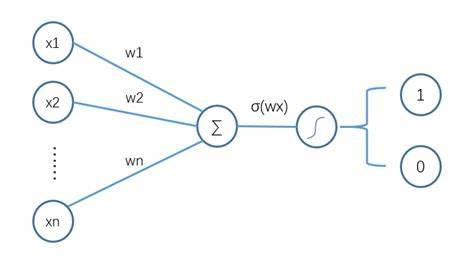

---

**工作原理** 

 - **线性组合**：  
   $ z = w_1x_1 + w_2x_2 + ... + w_nx_n + b $  
   （$w$=权重，$b$=偏置）
   
 - **概率转换**：  
   $ P(y=1|x) = \frac{1}{1 + e^{-z}} $  
   （Sigmoid函数把$z$压缩到[0,1]区间）

   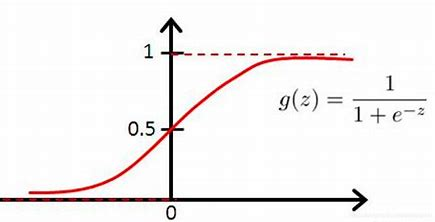
   
 - **分类决策**：  
   若 $ P(y=1|x) \geq 0.5 $，预测为类别1；否则为类别0。

---

**优势**  

| **特点**       | **说明**                     |
|----------------|------------------------------|
| **简单高效**   | 计算速度快，适合初学者快速上手 |
| **概率输出**   | 直接提供预测概率（可用于风险评估） |
| **可解释性强** | 特征权重明确（如性别对结果的影响方向和大小） |
| **适合线性数据** | 对线性可分问题效果显著（如广告点击预测） |
| **资源消耗低** | 不需要强大硬件支持 |

---

#### **适用场景**
- **二分类**：广告点击预测、垃圾邮件识别、疾病诊断。
- **概率分析**：信用评分、用户流失风险预测。
- **特征重要性**：找出关键因素（如年龄对购买行为的影响）。

---

#### **注意事项**
- **特征线性相关**：需确保特征与目标呈线性关系（否则需构造多项式特征）。
- **标准化必要**：需对特征进行标准化（如`StandardScaler`）。
- **类别不平衡**：需调整阈值或使用`class_weight='balanced'`。
- **过拟合风险**：可通过L1/L2正则化（`penalty='l1/l2'`）防止过拟合。


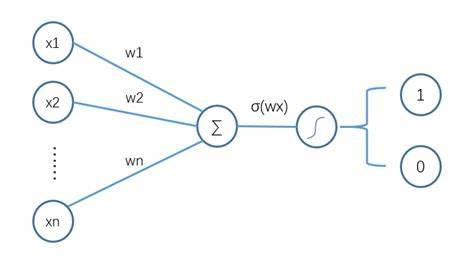
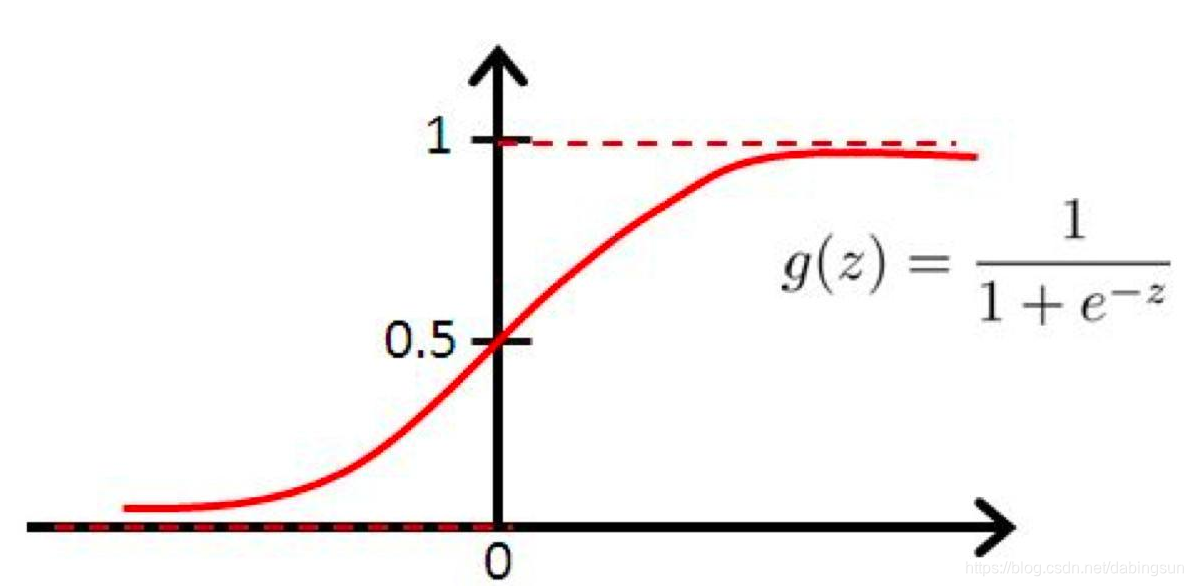
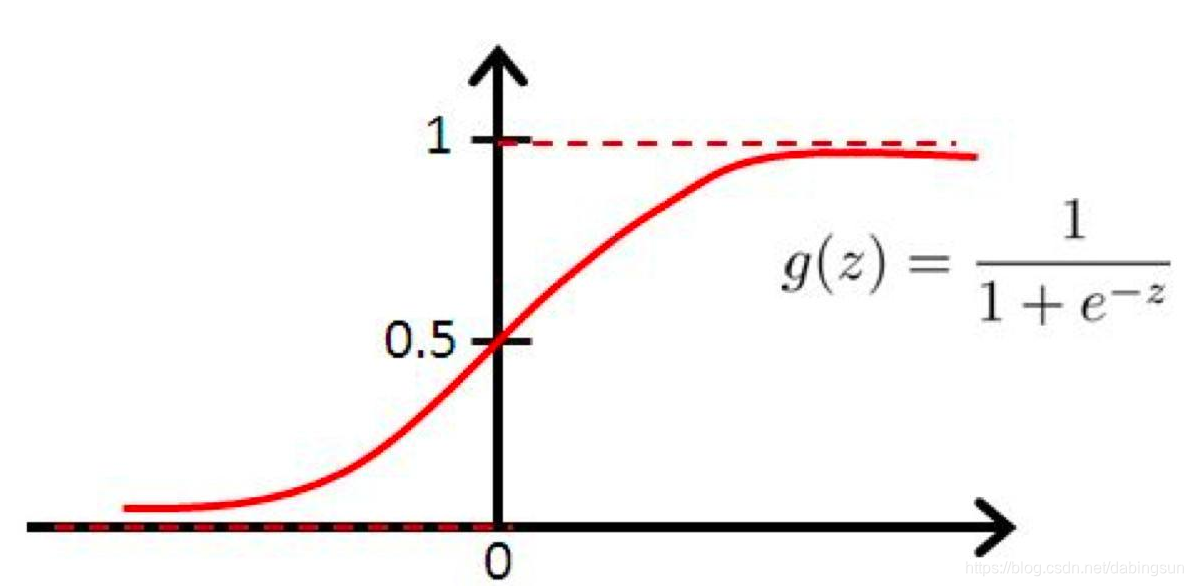
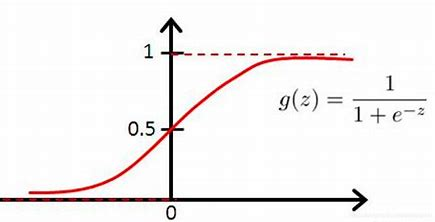

In [61]:
# 使用独热编码处理训练数据
cleaned_data = copy.deepcopy(full_data)

full_cleaned_data = pd.concat([cleaned_data[0], cleaned_data[1]])
# 使用get_dummies进行独热编码
full_cleaned_data = pd.get_dummies(full_cleaned_data, columns=processed_columns, dtype=int)
cleaned_data[0] = full_cleaned_data.iloc[:len(cleaned_data[0]), :]
cleaned_data[1] = full_cleaned_data.iloc[len(cleaned_data[0]):, :]

# 更新训练集和测试集
cleaned_train_df = cleaned_data[0]
cleaned_test_df = cleaned_data[1]
# 准备训练数据
X_train = cleaned_train_df.drop(['Survived'], axis=1)
y_train = cleaned_train_df["Survived"]
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,FamilySize,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Embarked_C,Embarked_Q,Embarked_S
0,3,22,1,0,7.2500,2,0,1,0,0,1,0,0,0,0,1
1,1,38,1,0,71.2833,2,1,0,0,0,0,1,0,1,0,0
2,3,26,0,0,7.9250,1,1,0,0,1,0,0,0,0,0,1
3,1,35,1,0,53.1000,2,1,0,0,0,0,1,0,0,0,1
4,3,35,0,0,8.0500,1,0,1,0,0,1,0,0,0,0,1


In [62]:
# 特征归一化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
float_columns = ["Age", "Fare"]  # 选择浮点类型数据进行归一化
X_train[float_columns] = scaler.fit_transform(X_train[float_columns])
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,FamilySize,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Embarked_C,Embarked_Q,Embarked_S
0,3,-0.531048,1,0,-0.502445,2,0,1,0,0,1,0,0,0,0,1
1,1,0.670256,1,0,0.786845,2,1,0,0,0,0,1,0,1,0,0
2,3,-0.230722,0,0,-0.488854,1,1,0,0,1,0,0,0,0,0,1
3,1,0.445012,1,0,0.420730,2,1,0,0,0,0,1,0,0,0,1
4,3,0.445012,0,0,-0.486337,1,0,1,0,0,1,0,0,0,0,1


In [63]:
# 验证集划分（保留20%数据）
from sklearn.model_selection import train_test_split
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42)

逻辑回归准确率： 0.8156424581005587


Text(0.5, 1.0, '特征重要性')

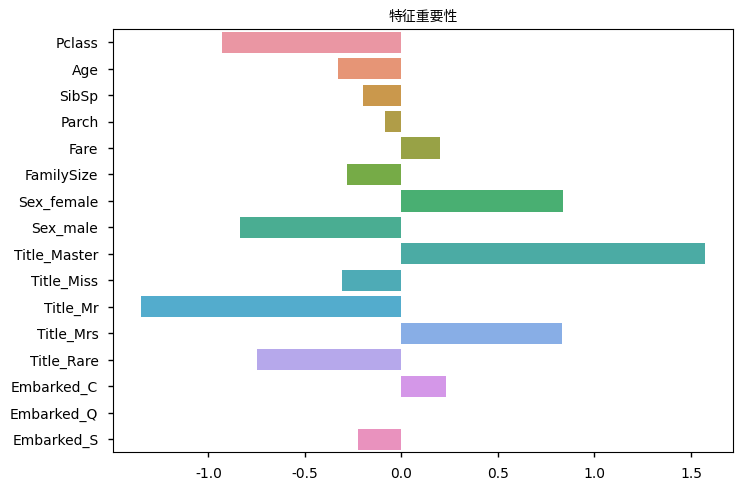

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 使用逻辑回归训练模型
logreg = LogisticRegression(penalty='l2', max_iter=1000)
logreg.fit(X_train_split, y_train_split)

# 预测与评估
y_pred = logreg.predict(X_val)
y_proba = logreg.predict_proba(X_val)[:, 1]  # 取正类概率
print("逻辑回归准确率：", accuracy_score(y_val, y_pred))

# 查看特征权重（可解释性）
sns.barplot(x=logreg.coef_[0], y=X_train.columns)
plt.title('特征重要性', fontproperties=my_font)

逻辑回归这种线性模型具有最强的可解释性，我们可以使用逻辑回归中的特征系数，来观察模型中各个参数在模型中对于最终预测值的影响。

上图中系数为正的特征的增加会对幸存与否产生积极影响，而负系数特征增加会降低生存几率。

- Title 对于最终预测具有最大的影响，Mr的负影响最大，Master和Mrs的正影响最大；
- Pclass 为系数较高的负系数，说明随着Pclass的增加，舱位等级越低，幸存的概率会降低；
- Family_size 为负系数，与之前分析的家庭数量越高，幸存概率越低相符合；
- Age 也是系数比较高的负系数，即随着年龄的增加，幸存的概率会越来越低。

## 2.模型选择--K近邻

**核心思想**

*基于相似性原则：物以类聚，人以群分*  
KNN通过计算新样本与训练集中各样本的距离，找到最近的K个邻居，根据这些邻居的标签进行预测（如预测花的种类或用户购买类别）。

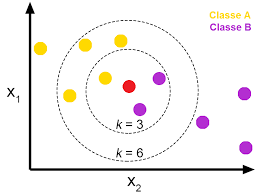

---
**工作原理**

- **距离度量**：  
  常用欧氏距离（Euclidean Distance）计算样本间相似性：  
  $ d(x, y) = \sqrt{\sum_{i=1}^n (x_i - y_i)^2} $

- **K值选择**：  
  - K=1：最近邻规则（可能受噪声干扰）  
  - K=5：取最近5个邻居的多数标签（更稳定）

- **分类决策**：  
  对K个邻居的标签进行多数投票（分类任务）或平均（回归任务）。

---

**优势**

| **特点**       | **说明**                     |
|----------------|------------------------------|
| **无需显式训练** | 直接保存训练数据，预测时计算（适合数据量小） |
| **复杂边界处理** | 能拟合任意形状的决策边界（如环形、孤岛状分布） |
| **简单直观**   | 原理易懂，适合初学者快速实现 |
| **对异常值不敏感** | 局部决策减少全局异常值影响（相比线性模型） |

---

#### **与逻辑回归对比**

| **对比项**   | **KNN**                    | **逻辑回归**               |
|--------------|----------------------------|----------------------------|
| **训练速度** | 极快（仅存储数据）         | 快（优化求解权重）         |
| **预测速度** | 慢（需计算所有样本距离）   | 极快（线性计算）           |
| **可解释性** | 低（依赖邻居样本）         | 高（权重明确）             |
| **高维数据** | 效果差（维度灾难）         | 可处理（需正则化）         |
| **线性关系** | 无需假设数据分布           | 假设线性关系               |

---

#### **适用场景**
- **小数据集**：如手写数字识别、疾病诊断（样本量<1万）。
- **快速验证**：作为基线模型对比其他复杂算法。

---

#### **注意事项**
- **特征标准化必要**：不同量纲特征会扭曲距离计算（如身高与收入直接比较）。
- **K值敏感**：K过小导致过拟合，K过大致使边界模糊（建议交叉验证选择）。
- **计算成本高**：大数据集下预测速度慢（可考虑KD树优化）。

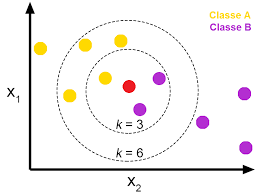

In [65]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_split, y_train_split)

# 预测与评估
y_pred = knn.predict(X_val)
print("逻辑回归准确率：", accuracy_score(y_val, y_pred))

逻辑回归准确率： 0.8044692737430168


# 3. 模型选择--决策树

1. 决策树是一种基本的分类与回归方法。这里主要讨论决策树用于分类。

2. 决策树模型是描述对样本进行分类的树形结构。树由结点和有向边组成：

- 内部结点表示一个特征或者属性。

- 叶子结点表示一个分类。

- 有向边代表了一个划分规则。

3. 决策树从根结点到子结点的的有向边代表了一条路径。决策树的路径是**互斥并且是完备的**。

4. 用决策树进行分类时，从根节点开始，按照树所对应地特征顺序递归地对样本数据按照有向边地划分规则进行测试，直到该样本被划分叶结点。最后将样本分配为叶结点所属的类。

5. 决策树的优点：可读性强，可解释性高，分类速度快。

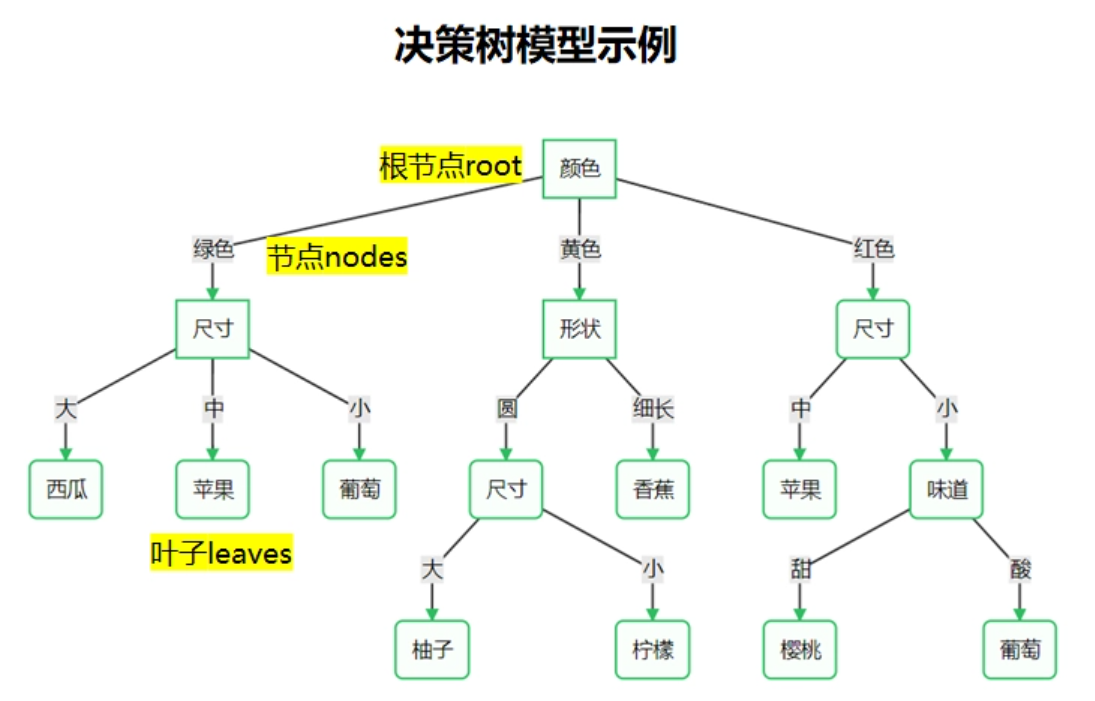
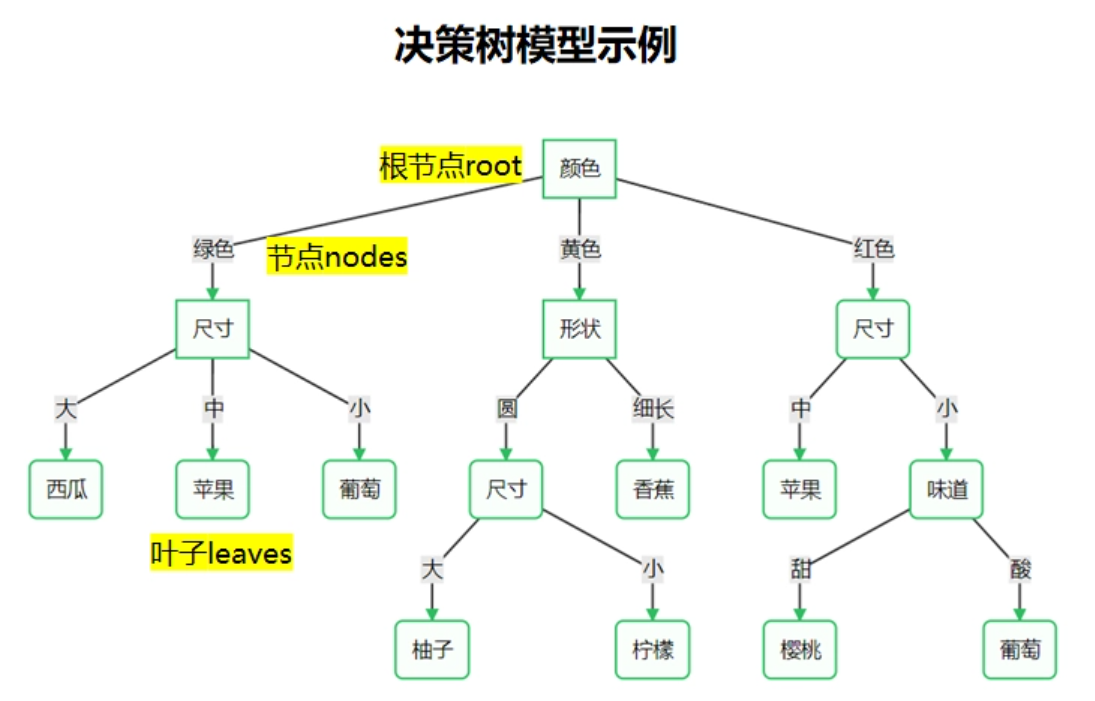

In [66]:
from sklearn.preprocessing import LabelEncoder
cleaned_data = copy.deepcopy(full_data)
# 使用label_encoder进行数值编码
encoder = LabelEncoder()
processed_columns = ["Sex", "Title", "Embarked"]
for column in processed_columns:
    # 训练集使用fit_transform先训练encoder再为训练数据进行编码
    cleaned_data[0][column] = encoder.fit_transform(cleaned_data[0][column])
    # 测试集使用transform不进行训练直接为测试数据进行编码
    cleaned_data[1][column] = encoder.transform(cleaned_data[1][column])
    
cleaned_data[0].head()
# 更新训练集和测试集
cleaned_train_df = cleaned_data[0]
cleaned_test_df = cleaned_data[1]
cleaned_train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,0,3,1,22,1,0,7.2500,2,2,2
1,1,1,0,38,1,0,71.2833,0,2,3
2,1,3,0,26,0,0,7.9250,2,1,1
3,1,1,0,35,1,0,53.1000,2,2,3
4,0,3,1,35,0,0,8.0500,2,1,2


## 常用决策树模型1--随机森林模型

**核心思想**

   *三个臭皮匠，顶个诸葛亮*
   
   随机森林由多个决策树 组成，每棵树基于不同数据 和部分特征 训练，最终通过投票 （分类）或平均 （回归）得出结果。

---

**工作原理**
1. **随机抽样**：从数据中随机抽取多个子集（有放回抽样）。
2. **随机选特征**：每棵树分裂时只考虑部分特征（如一半）。
3. **集成预测**：  
   - **分类**：多数树投票决定最终类别。  
   - **回归**：取所有树预测值的平均值。

---

#### **优势**  
| **特点**       | **说明**                     |
|----------------|------------------------------|
| **准确率高**   | 多树协作，减少单一误差       |
| **抗过拟合**   | 随机性和多样性降低模型复杂度 |
| **无需调参**   | 默认参数通常表现良好         |
| **自动特征交互** | 树结构自动捕捉特征组合关系   |
| **鲁棒性强**   | 对缺失值和异常值不敏感       |
| **特征重要性** | 可分析哪些特征对结果影响大   |

---

#### **与其他算法对比**

| **对比项**     | **单一决策树** | **随机森林**    | **逻辑回归**  | **KNN**              |
| ----------- | --------- | ----------- | --------- | -------------------- |
| **准确性**     | 较低        | 较高          | 中等        | 中等偏高                 |
| **稳定性**     | 易受数据波动影响  | 稳定性强        | 稳定性好      | 稳定性一般（受 k 值 和距离度量影响） |
| **训练速度**    | 快         | 较慢（多棵树）     | 快         | 较慢（懒惰学习，预测时开销大）      |
| **预测速度**    | 快         | 中等          | 快         | 慢（需计算所有样本距离）         |
| **可解释性**    | 高（易读单棵树）  | 低（需汇总特征重要性） | 较高（权重可解释） | 低（基于距离，难以解释具体决策边界）   |
| **参数调优**    | 少（树深、叶子数） | 较多（树数、深度等）  | 少（正则化系数）  | 较多（k 值、距离度量、加权策略）    |
| **抗过拟合能力**  | 弱         | 强           | 较强（正则化可控） | 中等（高维易受噪声影响）         |
| **对异常值敏感性** | 中等        | 低（平均效果）     | 低（对数几率稳健） | 高（距离计算受异常值强烈影响）      |

---

#### **适用场景**
- **分类**：垃圾邮件识别、疾病诊断。
- **回归**：房价预测、销量预测。
- **特征选择**：找出关键影响因素（如用户流失原因）。

---

#### **注意事项**
- **资源消耗**：树越多，计算越慢（可用并行计算加速）。
- **实时性**：预测速度不如单一模型快。
- **类别不平衡**：需通过参数调整平衡结果（如 `class_weight='balanced'`）。

随机森林准确率： 0.8268156424581006


Text(0.5, 1.0, '特征重要性')

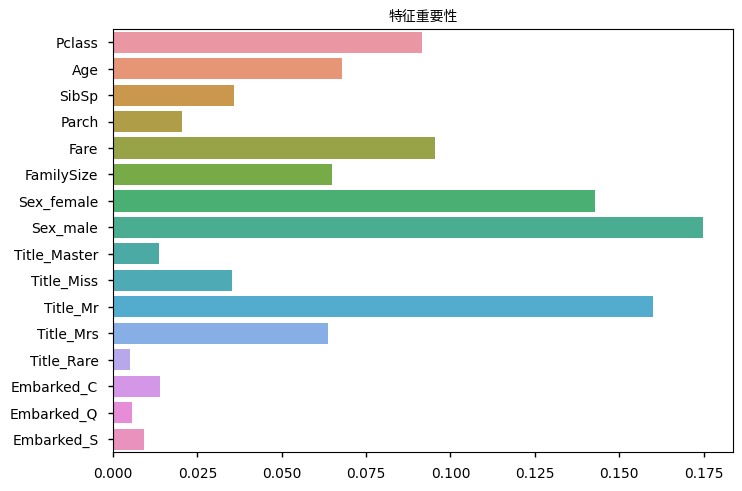

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train_split, y_train_split)
print("随机森林准确率：", rf.score(X_val, y_val))

# 特征重要性分析
sns.barplot(x=rf.feature_importances_, y=X_train.columns)
plt.title('特征重要性', fontproperties=my_font)

## 常用决策树模型2--梯度提升树模型

#### **核心思想**  

*一棵树不够，多棵树接力优化*  
    
GBDT 通过**串行训练多棵决策树**，每棵树学习前一棵树的**残差（误差）**，逐步逼近真实值。

---

#### **工作原理**
1. **初始化模型**：用一棵树拟合目标值（如平均值）。  
2. **计算残差**：当前模型的预测值与真实值的差。  
3. **训练新树**：用新树拟合残差。  
4. **更新模型**：将新树的预测值加到模型中（乘以学习率）。  
5. **重复步骤2-4**，直到达到设定的树数量或残差收敛。

---

#### **公式说明**  
1. **损失函数**（如均方误差）：  
   $$ L(y, F(x)) = \frac{1}{2}(y - F(x))^2 $$  
   （$F(x)$ 是当前模型的预测值）

2. **负梯度计算**（残差）：  
   $$ r = -\frac{\partial L}{\partial F(x)} = y - F(x) $$

3. **模型更新**：  
   $$ F_{m}(x) = F_{m-1}(x) + \eta \cdot h_m(x) $$  
   （$\eta$=学习率，$h_m(x)$=第$m$棵树的预测值）

---

#### **优势**  
| **特点**       | **说明**                     |
|----------------|------------------------------|
| **高精度**     | 在表格数据上表现优异（如Kaggle竞赛） |
| **自动特征交互** | 树结构自动捕捉特征组合关系     |
| **灵活性强**   | 可自定义损失函数（如分类、回归、排序） |
| **鲁棒性强**   | 对缺失值和异常值不敏感         |

---

#### **与随机森林对比**
| **对比项**   | **GBDT**                   | **随机森林**         |
|--------------|----------------------------|----------------------|
| **训练速度** | 较慢（串行训练）           | 快（并行训练）       |
| **过拟合风险** | 高（需调参控制）           | 低                   |
| **调参难度** | 高（需调整学习率、树深度等） | 低（默认参数通常有效） |
| **非线性关系** | 效果极佳                   | 效果良好             |

---

#### **适用场景**
- **点击率预测**：广告推荐系统的用户行为建模。
- **金融风控**：信用评分、欺诈检测。
- **时序预测**：电力负荷、股票价格预测。
- **特征重要性**：分析关键影响因素（如用户流失原因）。

---

#### **注意事项**
- **过拟合风险**：树太深或迭代次数太多可能导致过拟合（需早停法控制）。  
- **数据敏感性**：对异常值敏感，需清洗数据。  
- **计算资源**：训练耗时较长（尤其大数据集）。  
- **早停法**：监控验证集误差，提前终止训练（如 `early_stopping_rounds=50`）。  


In [72]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

gbdt = GradientBoostingClassifier(random_state=42)   # 用于早停的验证集比例
gbdt.fit(X_train_split, y_train_split)

# 预测与评估
y_pred_gbdt = gbdt.predict(X_val)
y_prob_gbdt = gbdt.predict_proba(X_val)[:, 1]
print("验证集准确率：", accuracy_score(y_pred_gbdt, y_val))

验证集准确率： 0.8324022346368715


## 4. 模型评估



### **常用指标**
- TP: True Positive 真阳，预测为正，实际为正
- TN: True Negative 真阴，预测为负，实际为负
- FP: False Positive 假阳，预测为正，实际为负
- FN: False Negative 假阴，预测为负，实际为正


| 指标          | 公式/定义 | 适用场景 | 解释 |
|---------------|-----------|----------|------|
| **准确率（Accuracy）** | $\frac{TP+TN}{TP+TN+FP+FN}$ | 类别平衡 | 正确预测占总样本比例 |
| **精确率** | $\frac{TP}{TP+FP}$ | 关注误报 | 预测为正类的样本中实际为正类的比例 |
| **召回率（Recall）/真阳性率（TPR）** | $\frac{TP}{TP+FN}$ | 关注漏报/ROC曲线 | 实际正类样本中被正确预测的比例 |
| **假阳性率（FPR）** | $ \frac{\text{FP}}{\text{TP} + \text{FN}} $ | ROC曲线 | 负类样本中被错误识别为正类的比例 |
| **F1分数** | $2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}$ | 综合指标 | 精确率与召回率的调和平均 |
| **AUC-ROC曲线** | ROC曲线下面积（0.5-1） | 二分类 | 展示模型在不同阈值 下对正类（Positive）和负类（Negative）的区分能力 |

GridSearch + GBDT 性能指标

逻辑回归 性能指标

准确率： 0.8324022346368715
精确率： 0.8142857142857143
召回率： 0.7702702702702703
F1分数： 0.7916666666666666
AUC-ROC： 0.9055984555984555


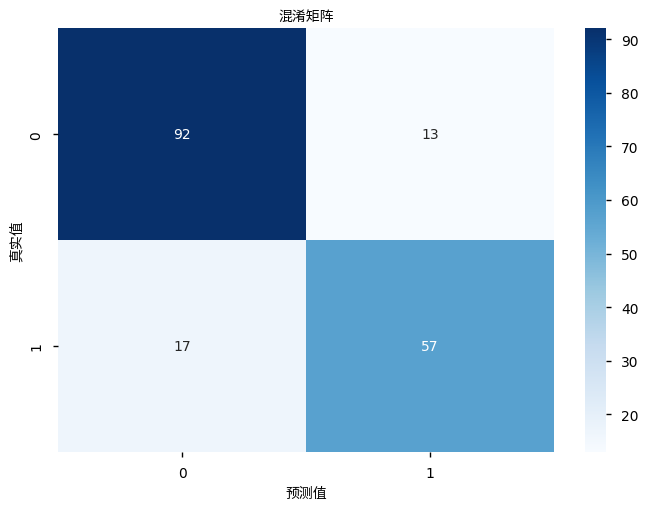

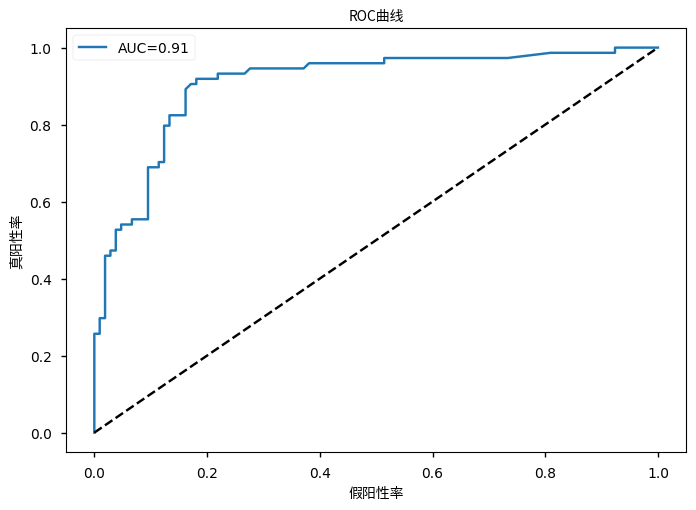

              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86       105
         1.0       0.81      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.83      0.83      0.83       179



In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
import matplotlib.pyplot as plt

# 计算指标
print("准确率：", accuracy_score(y_val, y_pred_gbdt))
print("精确率：", precision_score(y_val, y_pred_gbdt))
print("召回率：", recall_score(y_val, y_pred_gbdt))
print("F1分数：", f1_score(y_val, y_pred_gbdt))
print("AUC-ROC：", roc_auc_score(y_val, y_prob_gbdt))

# 混淆矩阵
conf_matrix = confusion_matrix(y_val, y_pred_gbdt)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("混淆矩阵", fontproperties=my_font)
plt.xlabel("预测值", fontproperties=my_font), plt.ylabel("真实值", fontproperties=my_font)
plt.show()

# ROC曲线
fpr, tpr, thresholds = roc_curve(y_val, y_prob_gbdt)
plt.plot(fpr, tpr, label=f"AUC={roc_auc_score(y_val, y_prob_gbdt):.2f}")
plt.plot([0,1], [0,1], 'k--')  # 随机线
plt.xlabel("假阳性率", fontproperties=my_font), plt.ylabel("真阳性率", fontproperties=my_font)
plt.title("ROC曲线", fontproperties=my_font)
plt.legend()
plt.show()

# 分类报告（精确率、召回率、F1分数）
print(classification_report(y_val, y_pred_gbdt))

准确率： 0.8044692737430168
精确率： 0.8
召回率： 0.7027027027027027
F1分数： 0.7482014388489208
AUC-ROC： 0.8904761904761904


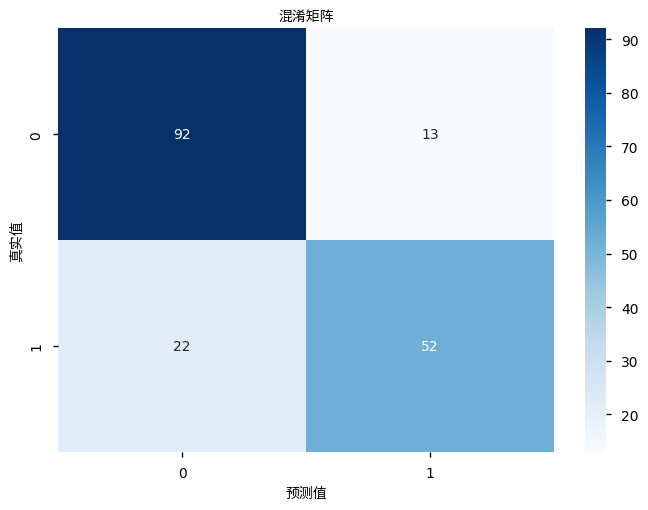

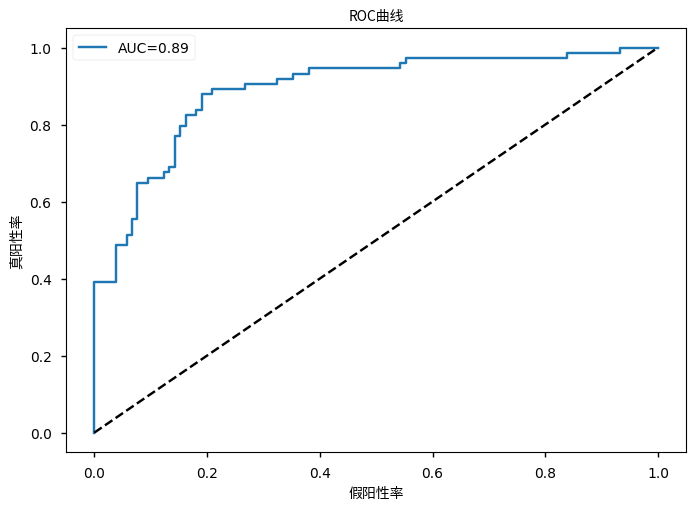

              precision    recall  f1-score   support

         0.0       0.81      0.88      0.84       105
         1.0       0.80      0.70      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
import matplotlib.pyplot as plt

# 计算指标
print("准确率：", accuracy_score(y_val, y_pred))
print("精确率：", precision_score(y_val, y_pred))
print("召回率：", recall_score(y_val, y_pred))
print("F1分数：", f1_score(y_val, y_pred))
print("AUC-ROC：", roc_auc_score(y_val, y_proba))

# 混淆矩阵
conf_matrix = confusion_matrix(y_val, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("混淆矩阵", fontproperties=my_font)
plt.xlabel("预测值", fontproperties=my_font), plt.ylabel("真实值", fontproperties=my_font)
plt.show()

# ROC曲线
fpr, tpr, thresholds = roc_curve(y_val, y_proba)
plt.plot(fpr, tpr, label=f"AUC={roc_auc_score(y_val, y_proba):.2f}")
plt.plot([0,1], [0,1], 'k--')  # 随机线
plt.xlabel("假阳性率", fontproperties=my_font), plt.ylabel("真阳性率", fontproperties=my_font)
plt.title("ROC曲线", fontproperties=my_font)
plt.legend()
plt.show()

# 分类报告（精确率、召回率、F1分数）
print(classification_report(y_val, y_pred))

# 五、使用全量数据训练模型推理测试数据，并上传结果验证

In [75]:
# 使用数值编码处理训练数据
cleaned_data = copy.deepcopy(full_data)
encoder = LabelEncoder()
processed_columns = ["Sex", "Title", "Embarked"]
for column in processed_columns:
    # 训练集使用fit_transform先训练encoder再为训练数据进行编码
    cleaned_data[0][column] = encoder.fit_transform(cleaned_data[0][column])
    # 测试集使用transform不进行训练直接为测试数据进行编码
    cleaned_data[1][column] = encoder.transform(cleaned_data[1][column])
    
cleaned_data[0].head()
full_cleaned_data = pd.concat([cleaned_data[0], cleaned_data[1]])
cleaned_data[0] = full_cleaned_data.iloc[:len(cleaned_data[0]), :]
cleaned_data[1] = full_cleaned_data.iloc[len(cleaned_data[0]):, :]

# 更新训练集和测试集
cleaned_train_df = cleaned_data[0]
cleaned_test_df = cleaned_data[1].drop(['Survived'], axis=1)
# 准备训练数据
X_train = cleaned_train_df.drop(['Survived'], axis=1)
y_train = cleaned_train_df['Survived']

In [76]:
rf = GradientBoostingClassifier(random_state=42)
rf.fit(X_train, y_train)

predictions = rf.predict(cleaned_test_df).astype(int)

submission = pd.DataFrame({
    "PassengerId": test_passenger_id,
    "Survived": predictions
})

submission.to_csv("submission.csv", index=False)
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
